<a href="https://colab.research.google.com/github/yoshita18/House-price-prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [ ]:
#Import california dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [ ]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [ ]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
print(housing.target_names)

['MedHouseVal']


In [ ]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
#Create a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#Add a new coloumn of the target value(i.e the Median house value) in the DataFrame
df['MEDV'] = housing.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
MEDV          float64
dtype: object

In [ ]:
df.info

<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [ ]:
#Check if any values in dataset are null
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

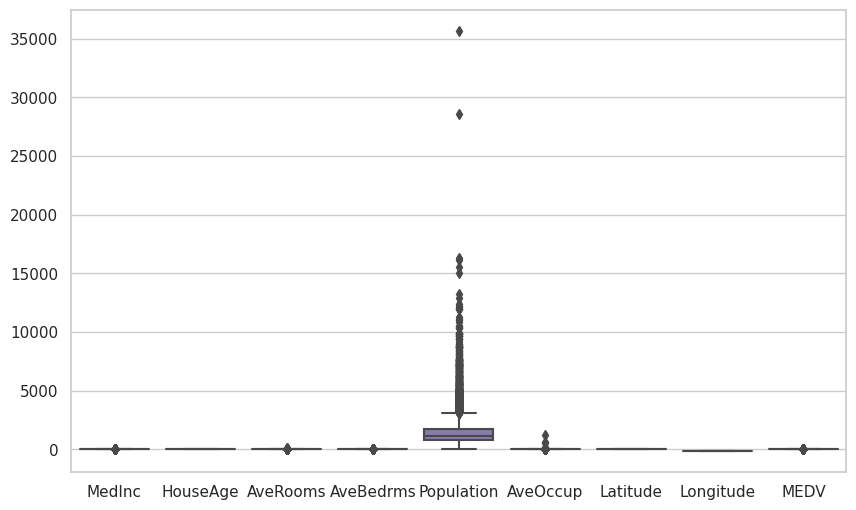

In [ ]:
#Create a boxplot using seaborn library
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.show()

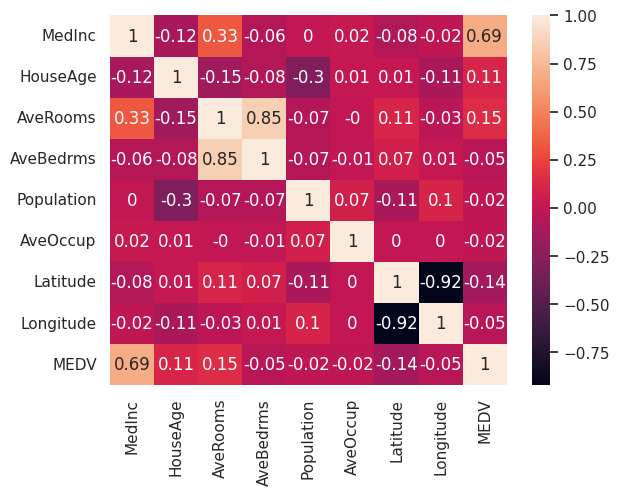

In [ ]:
#Create heatmap using seaborn library
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)
plt.show()

<Axes: xlabel='MEDV', ylabel='Density'>

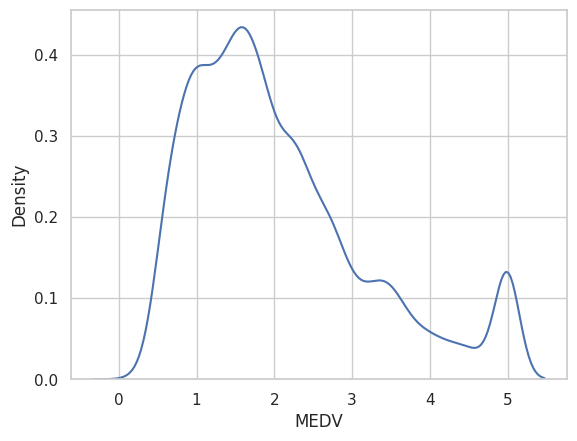

In [ ]:
#Create Kernel Density plot
sns.kdeplot(data=df, x="MEDV")

In [ ]:
#Select features for evaluating the target and form two seperate arrays
X1 = df[['MedInc','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude' ]]
Y1=df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 #Splitting the data for training and testing
  x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size =0.33,random_state = 5 )


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#Linear Regression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
#Create a new DataFrame with actual target values and the predicted target values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
14772,0.936,1.855677
10105,1.536,2.032601
20094,1.325,0.893898
19261,1.479,1.812279
14139,1.207,1.754738
...,...,...
11853,0.559,-0.274582
589,1.958,2.263994
4132,2.142,1.951084
12580,0.878,0.753551


In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.5392474487779035

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

0.5470811211267506

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.7396493230759768

In [ ]:
metrics.r2_score(y_test,y_pred)

0.6016682965401731

In [ ]:
x1 = np.array(x_test['AveRooms'])
y1 = np.array(y_pred)
deg=1
m,b=np.polyfit(x1,y1,deg)

Text(0, 0.5, 'Median Value')

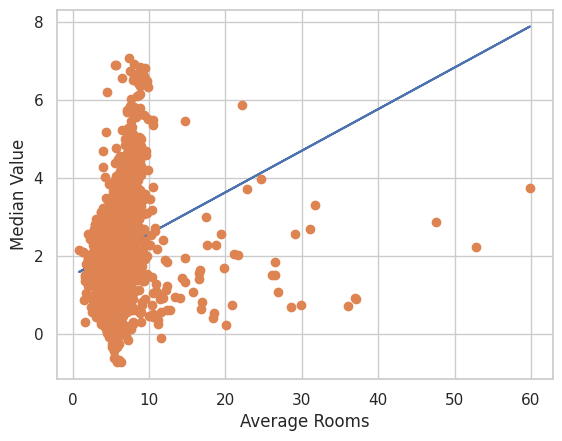

In [ ]:
plt.plot(x_test['AveRooms'], m*x_test['AveRooms'] + b)
plt.plot(x_test['AveRooms'],y_pred,'o')
plt.xlabel("Average Rooms")
plt.ylabel("Median Value")

In [ ]:
print(df.columns)
print(df.dtypes)

Index(['Actual', 'Predicted'], dtype='object')
Actual       float64
Predicted    float64
dtype: object


In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target

In [ ]:
print(df.columns)
print(df.dtypes)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV'],
      dtype='object')
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
MEDV          float64
dtype: object


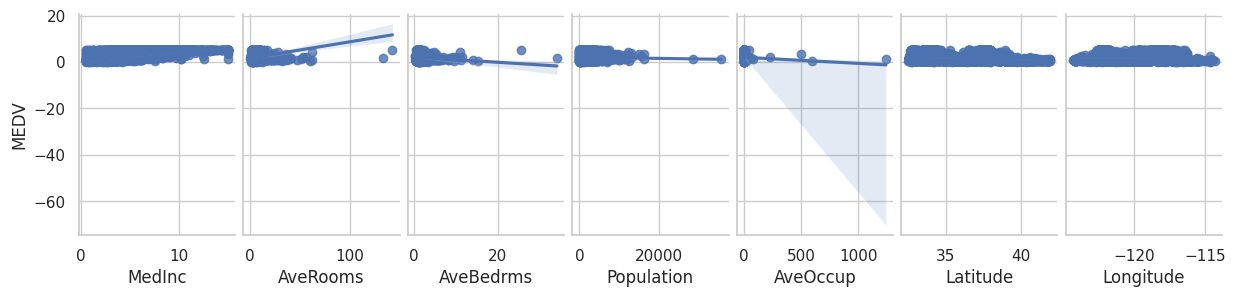

In [ ]:
sns.pairplot(df, x_vars=['MedInc','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'], y_vars='MEDV', height=3, aspect=0.6, kind='reg')
plt.show()